# 关联分析：Apriori算法
关联分析是数据挖掘中一种简单而实用的技术，它通过深入分析数据集，寻找事物间的关联性，挖掘频繁出现的组合，并描述组合内对象同时出现的模式和规律。例如，对超市购物的数据进行关联分析，通过发现顾客所购买的不同商品之间的关系，分析顾客的购买习惯，设计商品的组合摆放位置，制定相应的营销策略，从而制造需求，提高销售额，创造额外收入。<p>
Apriori算法的核心是一种递推算法,步骤如下。<p>
步骤1：设定最小支持度和最小置信度；<p>
步骤2：根据最小支持度找出所有的频繁项集；<p>
步骤3：根据最小置信度发现强关联规则。<p>
关联规则X→Y的置信度为在购买项集X的基础上购买项集Y的概率P（Y|X）=P（XY）/P(X)
    
在Python中可以利用mlxtend库快速推导强关联规则。

## 创建虚拟环境并在JuperNotebook中运行虚拟环境
由于本节课使用的mlxtend库较大，且依赖库的版本可能与前几节课冲突，这里建议大家创建虚拟环境后安装。<p>
虚拟环境适用于以下场景，假如当前有两个项目A和B，两个项目都需要依赖C库，但需要的C库版本不同，那就造成一个问题，即A、B项目只能运行其中一个，如果要运行另一个需要安装与之相适应的库的版本。<p>
在这种情况下，可以通过 **创建虚拟环境** 来解决冲突。<p>
    虚拟环境是一个 **完全独立** 的 **局部** Python环境，在此环境中，安装所有与项目相匹配的库即可，虚拟环境之间互相之间不会产生干扰。<p>
    虚拟环境的创建方法：在Anaconda Prompt中输入"conda create -n your_env_name"即可创建，其中your_env_name可以是任意名字，在创建时，可以直接指定该环境的Python版本和一些库的版本，如，需要创建一个python版本为3.7,numpy版本为1.16.1的虚拟环境，就可以将命令扩写为"conda create -n your_env_name python=3.7 numpy=1.16.1" 如遇询问是否执行安装操作，需输入y，回车<p>
   创建成功后，通过"conda activate your_env_name"激活该环境并执行安装其他库等操作<p>
   下面我们将通过mlxtend库的例子示范如何创建、激活虚拟环境并在Jupyter Notebook中使用虚拟环境

## 通过mlxtend库实现Apriori算法
为方便在JupyterNotebook中使用虚拟环境，我们需要先在基础环境中安装ipykernel,在Anaconda Prompt中输入"conda install ipykernel"并安装
### 创建虚拟环境
在Anaconda Prompt中输入"conda create -n mlxtend"创建一个名为mlxtend的虚拟环境
### 激活虚拟环境
在Anaconda Prompt中输入"conda activate mlxtend"激活这个虚拟环境，可看到命令行左侧的(base)变为了(mlxtend)说明激活成功
### 在虚拟环境中安装所需的包
在Anaconda prompt命令行窗口中输入并执行“pip install mlxtend”命令即可开始安装。mlxtend库的文件较大，初次安装时可能会失败，可以多尝试几次，或者从国内的镜像服务器安装，例如，从清华大学的镜像服务器安装mlxtend库的命令为“pip install mlxtend -i https://pypi.tuna.tsinghua.edu.cn/simple”(前面几次课我们已经配置了清华镜像源，所以直接pip install mlxtend即可）<p>
为方便在JupyterNotebook中使用虚拟环境，我们在虚拟环境中也要安装ipykernel,输入"conda install ipykernel"并安装<p>

### 在jupyter notebook中使用虚拟环境
随后输入"python -m ipykernel install --user --name mlxtend --display-name mlxtend"回车，mlxtend第一次出现是作为环境名称，第二次出现的位置是作为显示的名称。<p>
这时打开jupyter notebook,会发现新建文件时的环境除了Python3外，增加了一个mlxtend选项，点开本页面的Kernel->change kernel->mlxtend，稍等一段时间即可切换到虚拟环境下运行。*本节课关联分析部分代码全部在该环境下运行。*

因为mlxtend库中的apriori()函数可接受的数据类型为由布尔值（又称bool型数据，内容为True或Flase）或0/1值构成的DataFrame，所以需要先使用mlxtend库中的TransactionEncoder()函数对数据进行预处理，代码如下。

In [1]:
from mlxtend.preprocessing import TransactionEncoder
transactions = [['A','B','C'], ['A','B'], ['B','C'], ['A','B','C','D'],['B','C','D']]#创建事务库
TE = TransactionEncoder()  # 构造转换模型
data = TE.fit_transform(transactions)  # 将原始数据转换为bool值
# 通过在内容后面加?可以查看官方介绍
# TE.columns_?

In [2]:
import pandas as pd
df = pd.DataFrame(data, columns=TE.columns_)  # 用DataFrame存储bool数据
df#此时df的内容见下表，其中True表示购买过该商品，False表示未购买过该商品。

,A,B,C,D
0,True,True,True,False
1,True,True,False,False
2,False,True,True,False
3,True,True,True,True
4,False,True,True,True


将数据处理为mlxtend库可接受的特定格式后，我们从mlxtend库的frequent_patterns模块中引入apriori()函数来挖掘购物篮事务库中的频繁项集，代码如下。

In [3]:
from mlxtend.frequent_patterns import apriori
items = apriori(df, min_support=0.4, use_colnames=True)  # use_colnames=True表示使用df的列名而不是列索引作为返回的DataFrame列名
items

,support,itemsets
0,0.6,(A)
1,1.0,(B)
2,0.8,(C)
3,0.4,(D)
4,0.6,"(A, B)"
5,0.4,"(A, C)"
6,0.8,"(B, C)"
7,0.4,"(B, D)"
8,0.4,"(D, C)"
9,0.4,"(A, B, C)"


第1行代码从mlxtend库的frequent_patterns模块中引入apriori()函数；第2行代码将处理好的数据传入apriori()函数，设置min_support参数为0.4，代表最小支持度为0.4，设置use_colnames参数为True，代表使用变量df的列名作为返回的频繁项集中项的名称，最后将挖掘出的频繁项集赋给变量items，此时items为所有符合最小支持度要求的频繁项集，其内容见上表。<p>
    根据最小置信度在频繁项集中挖掘强关联规则，代码如下。

In [4]:
# 根据最小置信度在频繁项集中产生强关联规则
from mlxtend.frequent_patterns import association_rules
rules = association_rules(items, min_threshold=0.8)
rules
#第1行代码从mlxtend库的frequent_patterns模块中引入association_rules()函数；第2行代码将得到的频繁项集数据传入association_rules()函数，
#设置min_threshold参数为0.8，代表将最小置信度设置为0.8，最后将挖掘出的强关联规则赋给变量rules，其结果如下图所示

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(B),0.6,1.0,0.6,1.0,1.00,0.00,inf
1,(B),(C),1.0,0.8,0.8,0.8,1.00,0.00,1.0
2,(C),(B),0.8,1.0,0.8,1.0,1.00,0.00,inf
3,(D),(B),0.4,1.0,0.4,1.0,1.00,0.00,inf
4,(D),(C),0.4,0.8,0.4,1.0,1.25,0.08,inf
5,"(A, C)",(B),0.4,1.0,0.4,1.0,1.00,0.00,inf
6,"(B, D)",(C),0.4,0.8,0.4,1.0,1.25,0.08,inf
7,"(D, C)",(B),0.4,1.0,0.4,1.0,1.00,0.00,inf
8,(D),"(B, C)",0.4,0.8,0.4,1.0,1.25,0.08,inf


以第1条关联规则{A}→{B}为例讲解各列的含义。antecedents列代表关联规则中的前件，如关联规则{A}→{B}中的{A}；consequents列代表关联规则中的后件，如关联规则{A}→{B}中的{B}；antecedent support列代表前件的支持度，例如，A共出现3次（共5笔事务），所以关联前件支持度为3/5＝0.6<p>
    ；consequent support列代表后件的支持度，例如，B共出现5次，所以关联后件支持度为5/5＝1；support列代表该关联规则的支持度，例如，{A，B}共出现3次，所以关联规则的支持度为3/5＝0.6；confidence列代表该关联规则的置信度，可以用“关联规则支持度/前件支持度”来计算，如下所示，代入数值为（3/5）÷（3/5）＝1。<p>
通过如下代码提取results中的关联规则，并通过字符串拼接来更好地呈现关联规则。

In [5]:
# 通过如下代码更好地展示关联规则
for i, j in rules.iterrows():  # 遍历DataFrame二维表格的每一行
    X = j['antecedents']  # 关联规则的前件
    Y = j['consequents']  # 关联规则的后件
    x = ', '.join([item for item in X])  # 连接前件中的元素
    y = ', '.join([item for item in Y])  # 连接后件中的元素
    print(x + ' → ' + y)  # 通过字符串拼接打印关联规则

A → B
B → C
C → B
D → B
D → C
A, C → B
B, D → C
D, C → B
D → B, C


# PageRank算法
PageRank算法的核心思想<p>
（1）如果一个网页被很多其他网页链接到的话,说明这个网页比较重要，也就是PageRank值会相对较高<p>
（2）如果一个PageRank值很高的网页链接到一个其他的网页，那么被链接到的网页的PageRank值会相应地因此而提高<p>
 此部分会用到networkx库，可在虚拟环境中"pip install networkx"安装并继续进行实验

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import random

Graph = nx.DiGraph()
Graph.add_nodes_from(range(0,100)) #加100个节点
for _ in range(500):
    j = random.randint(0,100)
    k = random.randint(0,100)
    Graph.add_edge(j,k)
for _ in range(200):
    j = random.randint(0,100)
    k = random.randint(0,5)
    Graph.add_edge(j,k)
for j in range(50):
    Graph.add_edge(j, 0)

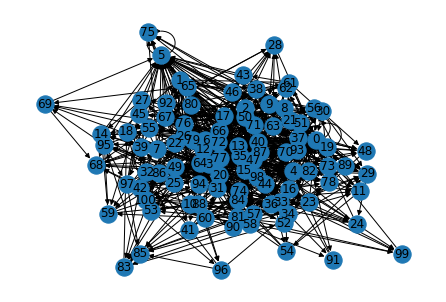

In [17]:
nx.draw(Graph, with_labels = True)
plt.show()

In [18]:
pr = nx.pagerank(Graph, max_iter = 1000, alpha = 0.01) #迭代100次， 初始pr=0.01
print(pr)

{0: 0.010795889007135963, 1: 0.010201780514637385, 2: 0.010249135032024398, 3: 0.010328823528335848, 4: 0.01027550372823647, 5: 0.010316074029776093, 6: 0.009867715162550169, 7: 0.009854669831216314, 8: 0.01001620436518942, 9: 0.009927950153858923, 10: 0.009855688551494038, 11: 0.009864118744857679, 12: 0.009882003278636687, 13: 0.009852066496478079, 14: 0.009866327435789798, 15: 0.009818416007987354, 16: 0.009812986929645346, 17: 0.009903132257518469, 18: 0.009918871410968127, 19: 0.009831463152646965, 20: 0.009875526349693794, 21: 0.009814350051076537, 22: 0.009862943842003247, 23: 0.009876102807899838, 24: 0.00985572136322776, 25: 0.009895536947502273, 26: 0.009909428787650007, 27: 0.009850425100049687, 28: 0.009893136868278665, 29: 0.009920641499216449, 30: 0.009925497152471804, 31: 0.00985187095377705, 32: 0.009900579404369008, 33: 0.009899125163049473, 34: 0.00984874034541059, 35: 0.009843077585682238, 36: 0.009886610549193129, 37: 0.009892888106475213, 38: 0.009883031649458463, 

In [19]:
max(pr.values())

0.010795889007135963

In [20]:
import operator
max(pr.items(), key = operator.itemgetter(1))[0]

0

In [21]:
sum(pr.values())

0.9999999999999998

In [15]:
min(pr.values())

0.009801980198019802